<a href="https://colab.research.google.com/github/dietmarja/LLM-Elements/blob/main/optimization/mini_batch_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini-Batch Gradient Descent

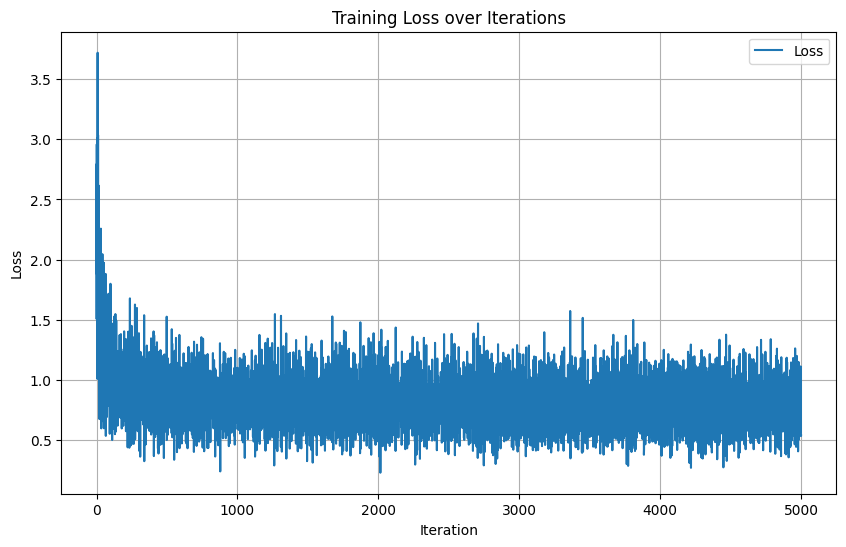

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define a simple neural network with one hidden layer
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0/input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0/hidden_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = np.maximum(0, self.Z1)  # ReLU activation
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.Z2  # For simplicity, we'll use a linear activation for the output
        return self.A2

    def compute_loss(self, Y, A2):
        return np.mean((Y - A2)**2)  # Mean Squared Error

    def backward(self, X, Y):
        m = X.shape[0]

        dZ2 = self.A2 - Y
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.A1 > 0)  # Derivative of ReLU
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

# Normalize data
def normalize_data(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Mini-Batch Gradient Descent for training the neural network
def mini_batch_gradient_descent_nn(nn, X, Y, learning_rate, num_iterations=50, batch_size=20, tol=1e-06):
    m = X.shape[0]
    losses = []

    for iteration in range(num_iterations):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]

            # Forward propagation
            nn.forward(X_batch)

            # Compute loss
            loss = nn.compute_loss(Y_batch, nn.A2)
            losses.append(loss)

            # Backward propagation
            dW1, db1, dW2, db2 = nn.backward(X_batch, Y_batch)

            # Update parameters
            nn.update_parameters(dW1, db1, dW2, db2, learning_rate)

            # Check for convergence
            if np.linalg.norm(dW1) < tol and np.linalg.norm(dW2) < tol:
                break

    return losses

# Example usage
np.random.seed(0)
X = np.random.randn(100, 3)  # 100 examples, 3 features
Y = np.random.randn(100, 1)  # 100 examples, 1 output

# Normalize the data
X = normalize_data(X)

# Initialize the neural network
nn = SimpleNeuralNetwork(input_size=3, hidden_size=4, output_size=1)

# Train the neural network
losses = mini_batch_gradient_descent_nn(nn, X, Y, learning_rate=0.01, num_iterations=1000, batch_size=20)

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Loss')
plt.title('Training Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()